In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd

In [3]:
from colonists.hex_grid import HexGrid
from colonists.rules import (get_hexes, assign_region_hex_indexes,
                             shuffle_regions, mark_port_nodes, get_hex_roll_order,
                             assign_collect_index, place_camp, get_empty_node_contents)
from colonists.user_interface import plot_hexes

--------------------------------------------------

# Initial hex layout

 - Arrange land hexes in random order.
 - Arrange port hexes in random order, interleaved with sea hexes
   (one sea hex between each pair of port hexes).


In [4]:
# ## Create hex grid ##
hex_grid = HexGrid(8, 17, .165, 1.75)

np.random.seed(2)

# ## Set up board on grid ##
#  - Assign region (land, port, sea) and terrain type (clay, sheep, ore, wheat, wood,
#    desert, clay port, sheep port, ore port, wheat port, wood port, 3:1 port, sea)
#    to each hex.
df_hexes = get_hexes(hex_grid.size)
#  - Shuffle hexes within regions.
shuffle_regions(df_hexes, inplace=True)
#  - Mark nodes based on the corresponding trade rules to apply.  If the nodes do
#    not correspond to any special trading privelege, assign a value of `NaN`.
df_nodes = mark_port_nodes(hex_grid.df_nodes, hex_grid.df_hex_paths,
                           hex_grid.df_hex_links, df_hexes)
#  - Assign an ordered 0-based index to each hex within each region.
assign_region_hex_indexes(df_hexes, inplace=True)

# ### Assign collect index (i.e., dice number) to each *land* hex. ###
#
#  - Select spiral direction and starting position for collect index assignment.
clockwise = np.random.randint(2)
shift = np.random.randint(0, 6)
hex_roll_order = get_hex_roll_order(shift=shift, clockwise=clockwise)
#  - Assign collect index (i.e., dice number) to each *land* hex.
assign_collect_index(df_hexes, hex_roll_order, inplace=True)

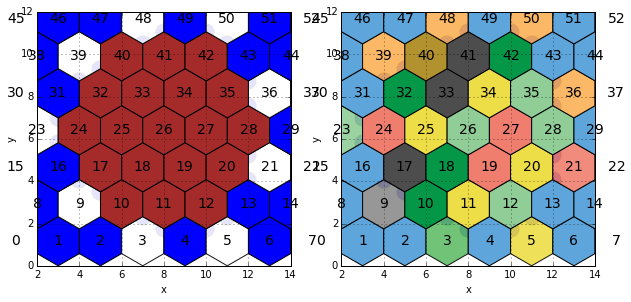

In [5]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(10, 10))
# Color each hex according to *region* type, label each hex by index.
plot_hexes(df_nodes, df_hexes, hex_grid.df_hex_paths, colorby='region', axis=axes[0])
# Color each hex according to *terrain* type, label each hex by index.
plot_hexes(df_nodes, df_hexes, hex_grid.df_hex_paths, colorby='terrain', axis=axes[1])

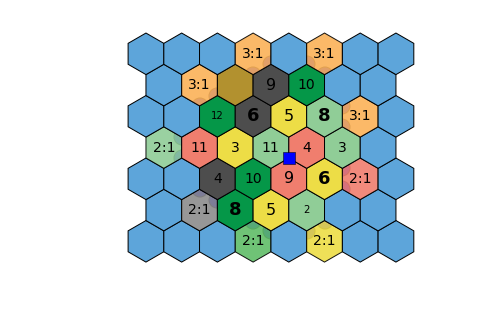

In [6]:
fig, axis = plt.subplots(figsize=(8, 10))
plot_hexes(df_nodes, df_hexes, hex_grid.df_hex_paths, colorby='terrain',
           axis=axis, labelby='collect_index') 
axis.set_axis_off()
selected = hex_grid.df_nodes.loc[[60]]
axis.plot(selected.x.values, selected.y.values, marker='s',
          markersize=12, linestyle='none')
pass

--------------------------------------------------

# Place a camp [done]

Place a camp at a selected node, subject to the following conditions:

 - Selected node cannot already be occupied by a *camp* or *village*.
 - Any *immediate neighbour* (i.e., only a single edge away) of the selected
   node cannot already be occupied by a *camp* or *village*.

In [7]:
selected = 60
df_node_contents = get_empty_node_contents(hex_grid.df_nodes)
df_result = place_camp(hex_grid.df_nodes, hex_grid.df_edges, df_hexes,
                       hex_grid.df_hex_links, selected, df_node_contents)
df_node_contents.loc[selected]
df_result.loc[selected]

camp       1
village    0
walls      0
castle     0
knight     0
Name: 60, dtype: int64